# Topics

## 1. PCA Applied to Face Images and "Whitening" 
## 2. PCA and SVM on Face Recognition
## 3. The Confusion Matrix

In [1]:
%matplotlib inline

''' Initial Imports'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.svm import SVC


# \*\*\*\*\*\*\*\*\*\*\*\* 
# Place the data set on google drive 
# for some reason, it takes a long time to download 
# the data. 
# \*\*\*\*\*\*\*\*\*\*\*\*

## To Downloading Faces (233MB)

## (This takes a while and you should start now):

http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz 


In [2]:
"""
sklearn face data base

"""

from sklearn import datasets

###############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, \
                                       resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
print('height and width of images:', h, w)

# The images in X have been collapsed into a 1D array
# just like for the handwritten digits
X = lfw_people.data

# X.shape[0] tells you the number of images (faces);
# this is the same as n_samples ahove
# X.shape[1] gives the number of pixels for each image
# or, "features"

print('X.shape', X.shape)
n_features = X.shape[1]


# the label/target to predict is the id of the person -- y is an integer
y = lfw_people.target
# target_names are actually names
target_names = lfw_people.target_names
print('target_names.shape', target_names.shape)
print('target_names', target_names)

# n_classes gives the number of people 
# Different from the number of faces (n_samples)!!
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples (number of faces): {0}".format(n_samples))
# n_features = 1850, which is 50x37, the dimension of the images.
print("n_features (number of pixels): {0}".format(n_features))
print("n_classes (number of people): {0}".format(n_classes))


height and width of images: 50 37
X.shape (1288, 1850)
target_names.shape (7,)
target_names ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
Total dataset size:
n_samples (number of faces): 1288
n_features (number of pixels): 1850
n_classes (number of people): 7


## "Whitening"

## Breakout Exercise:

- ## Do PCA on the first 500 images.  Use only 4 components
- ## Print out the PCA components (eigenvectors)
- ## Print out the PCA variances (eigenvalues)
- ## Calculate yourself the variance of along the 0th and 1st PCA axes

## Turn on whitening in your PCA instantiation: 

          whiten = True
          
## Run the cell again -- can you tell what changed?

In [3]:
x500 = X[:500, ]
# print(x500.shape)
pca = PCA(4)
# pca = PCA(4, whiten = True)
x_trans = pca.fit_transform(x500)
# x_trans = pca.fit(x500)
print("eigenvector:", pca.components_)
print("variances:", pca.explained_variance_)
# print(pca.components_[0].shape)
variance0 = np.var(x_trans[:, 0])
variance1 = np.var(x_trans[:, 1])
print(variance0)
print(variance1)

eigenvector: [[-0.00171167 -0.00188718 -0.00477223 ..., -0.01426285 -0.01422086
  -0.01390798]
 [-0.0254456  -0.02447076 -0.02559022 ...,  0.03231155  0.0320539
   0.03345388]
 [-0.02074062 -0.01764376 -0.01742082 ..., -0.04799965 -0.041061
  -0.03706346]
 [-0.03556924 -0.03758161 -0.03788461 ..., -0.02902506 -0.03130636
  -0.02524168]]
variances: [ 506687.5625    389540.4375    194728.296875  153637.6875  ]
505674.0
388761.0


## Discussing the solution

- ### The importance of whiten = True
    
- ### To understand why this helps: 

    ### Imagine just doing this with just 2 PCA components.  With whitening, in that 2D PCA space, the variance in each PCA direction is 1.  Then you expect to see clusters that are similar in extent in either direction -- meaning they would apear more circular.  This makes it easier to draw boundaries between clusters.

- ### This is a helpful resource 

    ### To see what whitening does:

    ### From http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

    ### Look under the Section "Whitening", subsection "2D example"
    
   ### Can plot the data in the 2D space of the first two PCA components, with and without whitening to show the effect -- either for the digit data (not much difference) or the face data 


## Breakout Exercise:

### Write a function, plot_faces() [similar to plot_dig()] to plot and label the faces with their correct names. (You may consider expanding the functionality of plot_faces() a bit so that it can label each image with both the correct names and predicted names.)


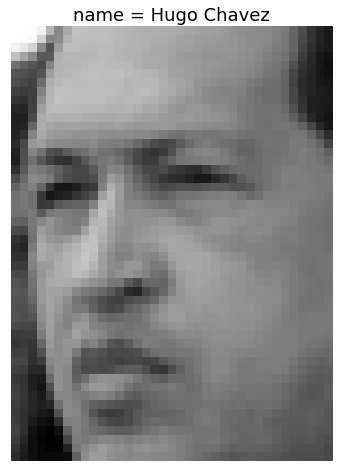

In [4]:
def plot_faces(imgs, y, names, select_idx):

    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
#     im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
#                     for i in range(nside)])
    im = imgs[select_idx]
    plt.imshow(im, cmap = 'gray')
    plt.grid(False)
    plt.title("name = {}".format(names[y[select_idx]]),
                 size=18)
    # Not sure what this line does.
#     plt.clim(0, 16)
    
# with 8 components, the '9' in the second row looks like 3!
# Even with 64 components, that '9' is still not clear!
plot_faces(lfw_people.images, y, target_names, 0)
plt.show()

## Breakout Exercse: Using this data set (the 7 people, each with at least 70 faces to do face recognition)

- ### First do training-testing split :

    split the sample (X) into two parts -- X_train and X_test.  For now let X_train be the first 1000 images, and X_test be the rest of the images (288).
    
    Perform PCA and SVM on X_train.  Then project X_test onto the PCA axes, and then use the trained SVM to predict for X_test.
    
    This is referred to as "k-fold."  Along with "leave-one-out", this is another way to test how good your algorithm is before using it in the "real world"

    (To connect with what we did for classifying digit image: in classify_dig_svm() from Week15-1, we did a (n-1, 1) split; here we do a train-test split or roughly (3:1), otherwise it's the same.  There the return value is y_pred[0], because there is only one element.  Here's it should just be y_pred since it's an array.)


- ### Find the success rate by comparing the prediction for X_test and the correct labels/targets for X_test.


In [5]:
from sklearn import svm

Xtrain = X[:1000, ]
Xtest = X[1000:, ]
# print(X_train.shape)
# print(X_test.shape)
# ytrain = y[:1000, ]
ytrain = y[:1000, ]
ytest = y[1000:, ]

n_comp = 50
pca = PCA(n_comp, whiten = True)

# finding pca axes
pca.fit(Xtrain)
# projecting training data onto pca axes
Xtrain_proj = pca.transform(Xtrain)
# projecting test data onto pca axes
Xtest_proj = pca.transform(Xtest)

print(Xtrain_proj.shape)
print(Xtest_proj.shape)

# ************************************* The SVM Section ********************************

# instantiating an SVM classifier
clf = svm.SVC(gamma=0.001, C=100.)

# apply SVM to training data and draw boundaries.
clf.fit(Xtrain_proj, ytrain)
# Use SVM-determined boundaries to make
# a prediction for the test data point.
ypred = clf.predict(Xtest_proj)

correct = np.sum(ytest == ypred)
        
print(correct/288*100)
# print(ytest)

(1000, 50)
(288, 50)
82.2916666667


## Precision vs. Recall

### "The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

### Precision (P) is defined as the number of true positives ($T_p$) over the number of true positives plus the number of false positives ($F_p$).

### $P = \frac{T_p}{T_p+F_p}$

### Recall (R) is defined as the number of true positives ($T_p$) over the number of true positives plus the number of false negatives ($F_n$).

### $R = \frac{T_p}{T_p + F_n}$

### These quantities are also related to the ($F_1$) score, which is defined as the harmonic mean of precision and recall.

### $F1 = 2\frac{P \times R}{P+R}$"


### Finally,

### "The support is the number of occurrences of each class in y_true."

(For more details, see

http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

and

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)


## End of Week15-3